<a href="https://colab.research.google.com/github/miquelyosafat/Text-Clustering-Pilpres2024/blob/master/SKRIPSI_MIGUEL_TEXT_CLUSTERING_FINAL_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***MENGGABUNGKAN DATASET DAN MEMFILTER DATA***

In [ ]:
import pandas as pd

# data anies, ganjar, dan prabowo digabung menjadi 1 dataset
csv_files = ['data-AniesBaswedan-Pilpres2024.csv', 'data-GanjarPranowo-Pilpres2024.csv', 'data-PrabowoSubianto-Pilpres2024.csv']

# Buat sebuah list kosong untuk menyimpan DataFrame dari setiap file CSV
dataframes = []

# Loop melalui setiap file CSV
for file in csv_files:
    # Baca file CSV menjadi DataFrame
    df = pd.read_csv(file)
    # Tambahkan DataFrame ke dalam list
    dataframes.append(df)

# Gabungkan DataFrame dalam list menjadi satu DataFrame tunggal
combined_df = pd.concat(dataframes, ignore_index=True)

# Filter data yang double, ambil data pertama
filtered_df = combined_df.drop_duplicates(keep='first')

# Cetak DataFrame hasil penggabungan
print(filtered_df)

# Simpan DataFrame hasil penggabungan menjadi file CSV
filtered_df.to_csv('data-Pilpres2024.csv', index=False)


                                                    URL  \
0     https://twitter.com/liqs_iskandar/status/16093...   
1     https://twitter.com/KarwapiWaphil/status/16093...   
2     https://twitter.com/bagisu91488423/status/1609...   
3     https://twitter.com/bagisu91488423/status/1609...   
4     https://twitter.com/AlamTimur3/status/16093375...   
...                                                 ...   
8799  https://twitter.com/Kabar_Tangsel/status/16010...   
8800  https://twitter.com/Kabar_Tangsel/status/16010...   
8801  https://twitter.com/Kabar_Tangsel/status/16010...   
8802  https://twitter.com/212bowie/status/1601047444...   
8803  https://twitter.com/BuchroniK/status/160104724...   

                           Date  \
0     2022-12-31 23:58:04+00:00   
1     2022-12-31 23:57:17+00:00   
2     2022-12-31 23:56:25+00:00   
3     2022-12-31 23:55:54+00:00   
4     2022-12-31 23:55:53+00:00   
...                         ...   
8799  2022-12-09 02:55:22+00:00   
8800  2022-

# ***IMPORT LIBRARIES***

In [ ]:
# Import libraries
!pip install nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# ***LOAD DATASET***

In [ ]:
import pandas as pd
# Load dataset
def load_data():
    data = pd.read_csv('data-Pilpres2024.csv')
    return data

data = load_data()
data.head(4)

URL  \
0  https://twitter.com/liqs_iskandar/status/16093...   
1  https://twitter.com/KarwapiWaphil/status/16093...   
2  https://twitter.com/bagisu91488423/status/1609...   
3  https://twitter.com/bagisu91488423/status/1609...   

                        Date  \
0  2022-12-31 23:58:04+00:00   
1  2022-12-31 23:57:17+00:00   
2  2022-12-31 23:56:25+00:00   
3  2022-12-31 23:55:54+00:00   

                                               Tweet                   ID  \
0  @dedimahardi @dghofur77 @addiems @DKIJakarta @...  1609338127013011456   
1  @tohariazka87 @joulepakir @MbahWin3 @FitrahDha...  1609337929092198402   
2          @fadilzein @aniesbaswedan President mimpi  1609337712204709890   
3  @aniesbaswedan Dg bertambahnya tahun moga ente...  1609337583972290561   

   Replies  Retweets  Likes  Quotes             Conv. ID Language Links Media  \
0        0         0      1       0  1609084312137400321       in   NaN   NaN   
1        2         0      0       0  1608663276027797504       in   NaN   NaN   
2        0         0      0       0  1609331159825289219       in   NaN   NaN   
3        2         0      6       0  1609331159825289219       in   NaN   NaN   

   Retweeted Tweet  Bookmarks        Username  
0              NaN          0   liqs_iskandar  
1              NaN          0   KarwapiWaphil  
2              NaN          0  bagisu91488423  
3              NaN          0  bagisu91488423

In [ ]:
#ubah dataframe sesuai column yang dibutuhkan
df  = pd.DataFrame(data[['Date','Username','Replies','Retweets','Likes','Tweet']])
df.head(4)

Date        Username  Replies  Retweets  Likes  \
0  2022-12-31 23:58:04+00:00   liqs_iskandar        0         0      1   
1  2022-12-31 23:57:17+00:00   KarwapiWaphil        2         0      0   
2  2022-12-31 23:56:25+00:00  bagisu91488423        0         0      0   
3  2022-12-31 23:55:54+00:00  bagisu91488423        2         0      6   

                                               Tweet  
0  @dedimahardi @dghofur77 @addiems @DKIJakarta @...  
1  @tohariazka87 @joulepakir @MbahWin3 @FitrahDha...  
2          @fadilzein @aniesbaswedan President mimpi  
3  @aniesbaswedan Dg bertambahnya tahun moga ente...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      8739 non-null   object
 1   Username  8739 non-null   object
 2   Replies   8739 non-null   int64 
 3   Retweets  8739 non-null   int64 
 4   Likes     8739 non-null   int64 
 5   Tweet     8739 non-null   object
dtypes: int64(3), object(3)
memory usage: 409.8+ KB


# ***CLEASING***



In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords


# cleansing data
def remove_URL(tweet):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_html(tweet):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_angka(tweet):
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)

    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    return tweet

def remove_punct(tweets):
    translator = str.maketrans('', '', string.punctuation)
    return tweets.translate(translator)

df['cleasing'] = df['Tweet'].apply(lambda x: remove_URL(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_html(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_emoji(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_punct(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_angka(x))

df.head(2)

Date       Username  Replies  Retweets  Likes  \
0  2022-12-31 23:58:04+00:00  liqs_iskandar        0         0      1   
1  2022-12-31 23:57:17+00:00  KarwapiWaphil        2         0      0   

                                               Tweet  \
0  @dedimahardi @dghofur77 @addiems @DKIJakarta @...   
1  @tohariazka87 @joulepakir @MbahWin3 @FitrahDha...   

                                            cleasing  
0  dedimahardi dghofur addiems DKIJakarta KPKRI K...  
1  tohariazka joulepakir MbahWin FitrahDharul eko...

# ***TOKENIZATION DAN CASE FOLDING***

In [ ]:
# Tokenization dan Case Folding
df['Tokenization and Case Folding'] = df['cleasing'].apply(lambda x: x.lower().split())

df.head(2)

Date       Username  Replies  Retweets  Likes  \
0  2022-12-31 23:58:04+00:00  liqs_iskandar        0         0      1   
1  2022-12-31 23:57:17+00:00  KarwapiWaphil        2         0      0   

                                               Tweet  \
0  @dedimahardi @dghofur77 @addiems @DKIJakarta @...   
1  @tohariazka87 @joulepakir @MbahWin3 @FitrahDha...   

                                            cleasing  \
0  dedimahardi dghofur addiems DKIJakarta KPKRI K...   
1  tohariazka joulepakir MbahWin FitrahDharul eko...   

                       Tokenization and Case Folding  
0  [dedimahardi, dghofur, addiems, dkijakarta, kp...  
1  [tohariazka, joulepakir, mbahwin, fitrahdharul...

# ***STOPWORD REMOVAL***

In [ ]:
# Stopword Removal
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['Filtering/ stopword removal'] = df['Tokenization and Case Folding'].apply(lambda x: remove_stopwords(x))

df.head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Date       Username  Replies  Retweets  Likes  \
0  2022-12-31 23:58:04+00:00  liqs_iskandar        0         0      1   
1  2022-12-31 23:57:17+00:00  KarwapiWaphil        2         0      0   

                                               Tweet  \
0  @dedimahardi @dghofur77 @addiems @DKIJakarta @...   
1  @tohariazka87 @joulepakir @MbahWin3 @FitrahDha...   

                                            cleasing  \
0  dedimahardi dghofur addiems DKIJakarta KPKRI K...   
1  tohariazka joulepakir MbahWin FitrahDharul eko...   

                       Tokenization and Case Folding  \
0  [dedimahardi, dghofur, addiems, dkijakarta, kp...   
1  [tohariazka, joulepakir, mbahwin, fitrahdharul...   

                         Filtering/ stopword removal  
0  [dedimahardi, dghofur, addiems, dkijakarta, kp...  
1  [tohariazka, joulepakir, mbahwin, fitrahdharul...

# ***STEMMING***

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.1 MB/s eta 0:00:00


In [ ]:
# membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# mendefinisikan fungsi untuk membendung teks
def stem_text(text):
    return [stemmer.stem(word) for word in text]

# terapkan stemming ke kolom 'Tweet' dan buat kolom baru 'stemmed_tweet'
df['Stemming data'] = df['Filtering/ stopword removal'].apply(lambda x: ' '.join(stem_text(x)))

# melihat 2 baris pertama dari data
df.head(2)

Date       Username  Replies  Retweets  Likes  \
0  2022-12-31 23:58:04+00:00  liqs_iskandar        0         0      1   
1  2022-12-31 23:57:17+00:00  KarwapiWaphil        2         0      0   

                                               Tweet  \
0  @dedimahardi @dghofur77 @addiems @DKIJakarta @...   
1  @tohariazka87 @joulepakir @MbahWin3 @FitrahDha...   

                                            cleasing  \
0  dedimahardi dghofur addiems DKIJakarta KPKRI K...   
1  tohariazka joulepakir MbahWin FitrahDharul eko...   

                       Tokenization and Case Folding  \
0  [dedimahardi, dghofur, addiems, dkijakarta, kp...   
1  [tohariazka, joulepakir, mbahwin, fitrahdharul...   

                         Filtering/ stopword removal  \
0  [dedimahardi, dghofur, addiems, dkijakarta, kp...   
1  [tohariazka, joulepakir, mbahwin, fitrahdharul...   

                                       Stemming data  
0  dedimahardi dghofur addiems dkijakarta kpkri k...  
1  tohariazka joulepakir mbahwin fitrahdharul eko...

In [ ]:
df.drop_duplicates(subset ="Stemming data", keep = 'first', inplace = True)
df.head(2)

Date       Username  Replies  Retweets  Likes  \
0  2022-12-31 23:58:04+00:00  liqs_iskandar        0         0      1   
1  2022-12-31 23:57:17+00:00  KarwapiWaphil        2         0      0   

                                               Tweet  \
0  @dedimahardi @dghofur77 @addiems @DKIJakarta @...   
1  @tohariazka87 @joulepakir @MbahWin3 @FitrahDha...   

                                            cleasing  \
0  dedimahardi dghofur addiems DKIJakarta KPKRI K...   
1  tohariazka joulepakir MbahWin FitrahDharul eko...   

                       Tokenization and Case Folding  \
0  [dedimahardi, dghofur, addiems, dkijakarta, kp...   
1  [tohariazka, joulepakir, mbahwin, fitrahdharul...   

                         Filtering/ stopword removal  \
0  [dedimahardi, dghofur, addiems, dkijakarta, kp...   
1  [tohariazka, joulepakir, mbahwin, fitrahdharul...   

                                       Stemming data  
0  dedimahardi dghofur addiems dkijakarta kpkri k...  
1  tohariazka joulepakir mbahwin fitrahdharul eko...

In [ ]:
df.to_csv('Preprocessing-Data-Pilpres-2024.csv',encoding='utf8', index=False)

# ***HASIL PREPROCESSING DATA***

In [ ]:
def load_data():
    data = pd.read_csv('Preprocessing-Data-Pilpres-2024.csv')
    return data

tweet_df = load_data()
tweet_df.head(2)

Date       Username  Replies  Retweets  Likes  \
0  2022-12-31 23:58:04+00:00  liqs_iskandar        0         0      1   
1  2022-12-31 23:57:17+00:00  KarwapiWaphil        2         0      0   

                                               Tweet  \
0  @dedimahardi @dghofur77 @addiems @DKIJakarta @...   
1  @tohariazka87 @joulepakir @MbahWin3 @FitrahDha...   

                                            cleasing  \
0  dedimahardi dghofur addiems DKIJakarta KPKRI K...   
1  tohariazka joulepakir MbahWin FitrahDharul eko...   

                       Tokenization and Case Folding  \
0  ['dedimahardi', 'dghofur', 'addiems', 'dkijaka...   
1  ['tohariazka', 'joulepakir', 'mbahwin', 'fitra...   

                         Filtering/ stopword removal  \
0  ['dedimahardi', 'dghofur', 'addiems', 'dkijaka...   
1  ['tohariazka', 'joulepakir', 'mbahwin', 'fitra...   

                                       Stemming data  
0  dedimahardi dghofur addiems dkijakarta kpkri k...  
1  tohariazka joulepakir mbahwin fitrahdharul eko...

In [ ]:
tweet_df.drop(tweet_df.columns[[5,6,7,8]], axis = 1, inplace = True)
tweet_df.head(4)

Date        Username  Replies  Retweets  Likes  \
0  2022-12-31 23:58:04+00:00   liqs_iskandar        0         0      1   
1  2022-12-31 23:57:17+00:00   KarwapiWaphil        2         0      0   
2  2022-12-31 23:56:25+00:00  bagisu91488423        0         0      0   
3  2022-12-31 23:55:54+00:00  bagisu91488423        2         0      6   

                                       Stemming data  
0  dedimahardi dghofur addiems dkijakarta kpkri k...  
1  tohariazka joulepakir mbahwin fitrahdharul eko...  
2            fadilzein aniesbaswedan president mimpi  
3    aniesbaswedan dg tambah moga ente gak ngibul lg

In [ ]:
#ubah dataframe sesuai column kalian
df  = pd.DataFrame(tweet_df[['Date','Username','Replies','Retweets','Likes','Stemming data']])
df.head(4)

Date        Username  Replies  Retweets  Likes  \
0  2022-12-31 23:58:04+00:00   liqs_iskandar        0         0      1   
1  2022-12-31 23:57:17+00:00   KarwapiWaphil        2         0      0   
2  2022-12-31 23:56:25+00:00  bagisu91488423        0         0      0   
3  2022-12-31 23:55:54+00:00  bagisu91488423        2         0      6   

                                       Stemming data  
0  dedimahardi dghofur addiems dkijakarta kpkri k...  
1  tohariazka joulepakir mbahwin fitrahdharul eko...  
2            fadilzein aniesbaswedan president mimpi  
3    aniesbaswedan dg tambah moga ente gak ngibul lg

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           8164 non-null   object
 1   Username       8164 non-null   object
 2   Replies        8164 non-null   int64 
 3   Retweets       8164 non-null   int64 
 4   Likes          8164 non-null   int64 
 5   Stemming data  8164 non-null   object
dtypes: int64(3), object(3)
memory usage: 382.8+ KB


In [ ]:
tweet_df.to_csv('Hasil-Preprocessing-Data-Pilpres2024.csv',encoding='utf8', index=False)

# ***WORDCLOUD SETELAH DATA SELESAI DI PREPROCESSING***

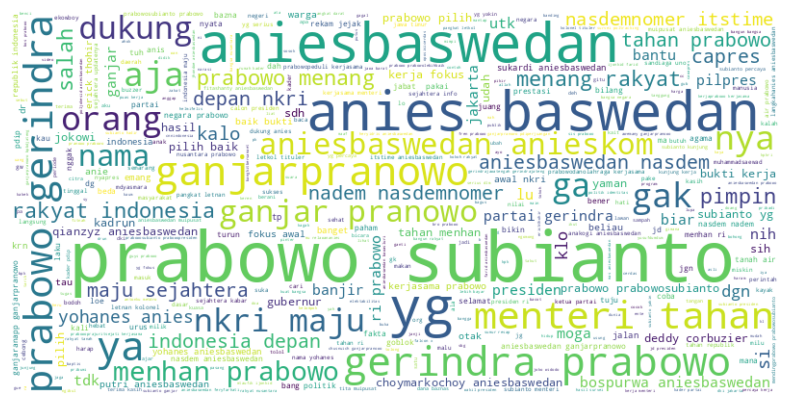

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('Hasil-Preprocessing-Data-Pilpres2024.csv')

# Menggabungkan semua tweet menjadi satu string
data = ' '.join(df['Stemming data'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=2000, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(8, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# ***WORDCLOUD ANIES BASWEDAN***

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('data-AniesBaswedan-Pilpres2024.csv')

# Menggabungkan semua teks dari kolom 'Tweet' menjadi satu string
text = ' '.join(df['Tweet'].astype(str).values)

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=2000, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(8, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# Menyimpan word cloud dengan resolusi tinggi dan tanpa pecah
plt.savefig('wcAniesBaswedan.png', dpi=300, bbox_inches='tight')

plt.show()

# ***WORDCLOUD PRABOWO SUBIANTO***

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('data-PrabowoSubianto-Pilpres2024.csv')

# Menggabungkan semua teks dari kolom 'Tweet' menjadi satu string
text = ' '.join(df['Tweet'].astype(str).values)

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=2000, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(8, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# Menyimpan word cloud dengan resolusi tinggi dan tanpa pecah
plt.savefig('wcPrabowoSubianto.png', dpi=300, bbox_inches='tight')

plt.show()

# ***WORDCLOUD GANJAR PRANOWO***

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('data-GanjarPranowo-Pilpres2024.csv')

# Menggabungkan semua teks dari kolom 'Tweet' menjadi satu string
text = ' '.join(df['Tweet'].astype(str).values)

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=2000, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(8, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# Menyimpan word cloud dengan resolusi tinggi dan tanpa pecah
plt.savefig('wcPrabowoSubianto.png', dpi=300, bbox_inches='tight')

plt.show()

# ***TEXT REPRESENTATION***

In [ ]:
import pandas as pd
# Load dataset
def load_data():
    data = pd.read_csv('Hasil-Preprocessing-Data-Pilpres2024.csv')
    return data

data = load_data()
data.head(4)

Date        Username  Replies  Retweets  Likes  \
0  2022-12-31 23:58:04+00:00   liqs_iskandar        0         0      1   
1  2022-12-31 23:57:17+00:00   KarwapiWaphil        2         0      0   
2  2022-12-31 23:56:25+00:00  bagisu91488423        0         0      0   
3  2022-12-31 23:55:54+00:00  bagisu91488423        2         0      6   

                                       Stemming data  
0  dedimahardi dghofur addiems dkijakarta kpkri k...  
1  tohariazka joulepakir mbahwin fitrahdharul eko...  
2            fadilzein aniesbaswedan president mimpi  
3    aniesbaswedan dg tambah moga ente gak ngibul lg

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           8164 non-null   object
 1   Username       8164 non-null   object
 2   Replies        8164 non-null   int64 
 3   Retweets       8164 non-null   int64 
 4   Likes          8164 non-null   int64 
 5   Stemming data  8164 non-null   object
dtypes: int64(3), object(3)
memory usage: 382.8+ KB


In [ ]:
data['Tweet'] = data['Stemming data'].str.replace('yg', '')
data.head(4)

Date        Username  Replies  Retweets  Likes  \
0  2022-12-31 23:58:04+00:00   liqs_iskandar        0         0      1   
1  2022-12-31 23:57:17+00:00   KarwapiWaphil        2         0      0   
2  2022-12-31 23:56:25+00:00  bagisu91488423        0         0      0   
3  2022-12-31 23:55:54+00:00  bagisu91488423        2         0      6   

                                       Stemming data  \
0  dedimahardi dghofur addiems dkijakarta kpkri k...   
1  tohariazka joulepakir mbahwin fitrahdharul eko...   
2            fadilzein aniesbaswedan president mimpi   
3    aniesbaswedan dg tambah moga ente gak ngibul lg   

                                               Tweet  
0  dedimahardi dghofur addiems dkijakarta kpkri k...  
1  tohariazka joulepakir mbahwin fitrahdharul eko...  
2            fadilzein aniesbaswedan president mimpi  
3    aniesbaswedan dg tambah moga ente gak ngibul lg

In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in data["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0  aniesbaswedan   4086
1        prabowo   3512
2       subianto   1971
3          anies   1624
4  ganjarpranowo   1362
5       baswedan   1133
6       gerindra    943
7      indonesia    813
8        menteri    638
9          kerja    612

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
px.bar(temp, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

In [ ]:
data.head(10)

Date        Username  Replies  Retweets  Likes  \
0  2022-12-31 23:58:04+00:00   liqs_iskandar        0         0      1   
1  2022-12-31 23:57:17+00:00   KarwapiWaphil        2         0      0   
2  2022-12-31 23:56:25+00:00  bagisu91488423        0         0      0   
3  2022-12-31 23:55:54+00:00  bagisu91488423        2         0      6   
4  2022-12-31 23:55:53+00:00      AlamTimur3        2         1     10   
5  2022-12-31 23:54:57+00:00    LANGKAHANIES        8        84    248   
6  2022-12-31 23:54:55+00:00   liqs_iskandar        1         0      1   
7  2022-12-31 23:54:40+00:00  bagisu91488423        0         0      0   
8  2022-12-31 23:54:07+00:00       Celebes07        1         0      1   
9  2022-12-31 23:52:40+00:00       Wedangan4        0         0      0   

                                       Stemming data  \
0  dedimahardi dghofur addiems dkijakarta kpkri k...   
1  tohariazka joulepakir mbahwin fitrahdharul eko...   
2            fadilzein aniesbaswedan president mimpi   
3    aniesbaswedan dg tambah moga ente gak ngibul lg   
4  aniesbaswedan yohanes baswedan hahaha politik ...   
5  mari wujud ubah indonesia mas aniesbaswedan su...   
6  dedimahardi dghofur addiems dkijakarta kpkri k...   
7  jackdorsiy musniumar aniesbaswedan buzzerrp jd...   
8  dwiekaputri mdyasmara muhammadsaewad helmifeli...   
9  bjakarta qianzyz aniesbaswedan wes dirunggoke wae   

                                               Tweet  
0  dedimahardi dghofur addiems dkijakarta kpkri k...  
1  tohariazka joulepakir mbahwin fitrahdharul eko...  
2            fadilzein aniesbaswedan president mimpi  
3    aniesbaswedan dg tambah moga ente gak ngibul lg  
4  aniesbaswedan yohanes baswedan hahaha politik ...  
5  mari wujud ubah indonesia mas aniesbaswedan su...  
6  dedimahardi dghofur addiems dkijakarta kpkri k...  
7  jackdorsiy musniumar aniesbaswedan buzzerrp jd...  
8  dwiekaputri mdyasmara muhammadsaewad helmifeli...  
9  bjakarta qianzyz aniesbaswedan wes dirunggoke wae

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menggunakan TfidfVectorizer untuk representasi vektor
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Stemming data'])

# Menampilkan hasil representasi vektor
print("Jumlah dokumen:", X.shape[0])
print("Jumlah fitur:", X.shape[1])
print(" ")
print("Representasi Vector:")
print(X.toarray())

Jumlah dokumen: 8164
Jumlah fitur: 13923
 
Representasi Vector:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
tweet_df.to_csv('Hasil-TextRepresentation.csv',encoding='utf8', index=False)

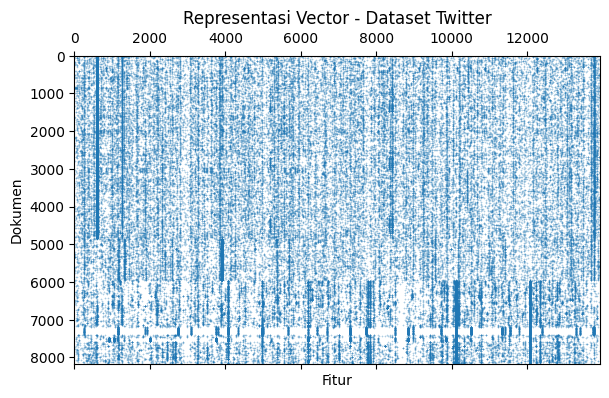

In [ ]:
# Plot representasi vektor
plt.figure(figsize=(7, 4))
plt.spy(X, markersize=0.1)
plt.xlabel('Fitur')
plt.ylabel('Dokumen')
plt.title('Representasi Vector - Dataset Twitter')
plt.show()

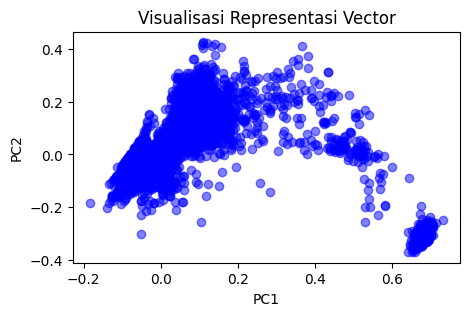

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Membuat plot
plt.figure(figsize=(5, 3))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', alpha=0.5)
plt.title('Visualisasi Representasi Vector')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# ***K-MEANS CLUSTERING***

In [ ]:
from sklearn.cluster import KMeans

# Menentukan jumlah cluster terbaik menggunakan metode elbow
# Jumlah cluster maksimal yang akan dievaluasi
max_clusters = 20
inertia = []
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



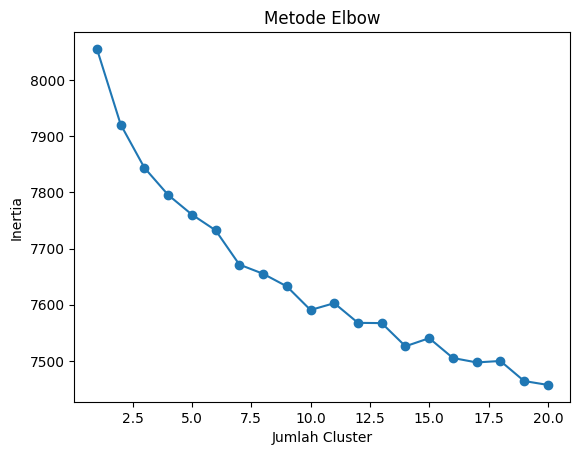

In [ ]:
# Plot metode elbow
plt.plot(range(1, max_clusters+1), inertia, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Menghitung silhouette score untuk berbagai jumlah kluster
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

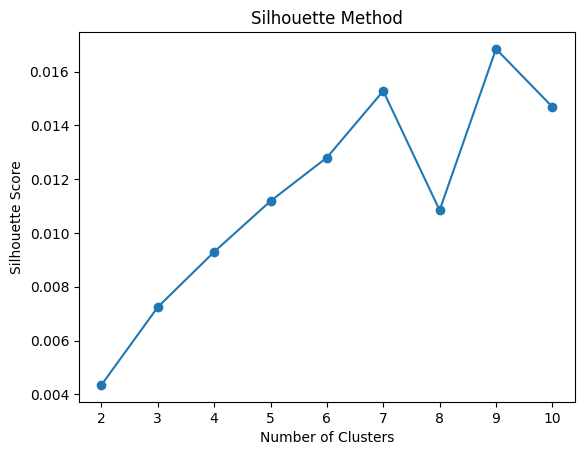

In [ ]:
# Membuat plot silhouette
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Melakukan clustering dengan k-means
kmeans = KMeans(n_clusters=20, max_iter=100, random_state=0)
kmeans.fit(X)

# Mendapatkan label klaster untuk setiap data
labels = kmeans.labels_

# Menambahkan kolom 'Cluster' ke DataFrame
data['Cluster'] = labels

data.head(4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Date        Username  Replies  Retweets  Likes  \
0  2022-12-31 23:58:04+00:00   liqs_iskandar        0         0      1   
1  2022-12-31 23:57:17+00:00   KarwapiWaphil        2         0      0   
2  2022-12-31 23:56:25+00:00  bagisu91488423        0         0      0   
3  2022-12-31 23:55:54+00:00  bagisu91488423        2         0      6   

                                       Stemming data  \
0  dedimahardi dghofur addiems dkijakarta kpkri k...   
1  tohariazka joulepakir mbahwin fitrahdharul eko...   
2            fadilzein aniesbaswedan president mimpi   
3    aniesbaswedan dg tambah moga ente gak ngibul lg   

                                               Tweet  Cluster  
0  dedimahardi dghofur addiems dkijakarta kpkri k...       12  
1  tohariazka joulepakir mbahwin fitrahdharul eko...       11  
2            fadilzein aniesbaswedan president mimpi       12  
3    aniesbaswedan dg tambah moga ente gak ngibul lg       12

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           8164 non-null   object
 1   Username       8164 non-null   object
 2   Replies        8164 non-null   int64 
 3   Retweets       8164 non-null   int64 
 4   Likes          8164 non-null   int64 
 5   Stemming data  8164 non-null   object
 6   Tweet          8164 non-null   object
 7   Cluster        8164 non-null   int32 
dtypes: int32(1), int64(3), object(4)
memory usage: 478.5+ KB


In [ ]:
df  = pd.DataFrame(data[['Tweet','Cluster']])
df.head(300)

Tweet  Cluster
0    dedimahardi dghofur addiems dkijakarta kpkri k...       12
1    tohariazka joulepakir mbahwin fitrahdharul eko...       11
2              fadilzein aniesbaswedan president mimpi       12
3      aniesbaswedan dg tambah moga ente gak ngibul lg       12
4    aniesbaswedan yohanes baswedan hahaha politik ...        5
..                                                 ...      ...
295  akhmadyani rinosupriyatno gerakanies busana lo...       12
296                   petkleesegh aniesbaswedan bangsa       12
297  qianzyz aniesbaswedan  ragu absah partai gelor...       14
298  aniesbaswedan yohanes lagak dah resmi capres w...       14
299  khojanxx qianzyz aniesbaswedan fahrihamzah ben...       14

[300 rows x 2 columns]

In [ ]:
df.to_csv('Hasil-KMeans-Clustering.csv',encoding='utf8', index=False)

# ***MEMBAGI CLUSTER***

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Baca dataset dari file CSV
dataset = pd.read_csv('Hasil-KMeans-Clustering.csv')

# Inisialisasi model K-Means dengan 10 cluster
kmeans = KMeans(n_clusters=20)

# Membuat dictionary untuk menyimpan setiap cluster
cluster_data = {}

# Loop untuk mengumpulkan setiap cluster
for cluster_id in range(20):
    # Filter dataset berdasarkan cluster
    cluster_data[cluster_id] = dataset[dataset['Cluster'] == cluster_id]

# Loop untuk menyimpan setiap cluster ke file CSV
for cluster_id, data in cluster_data.items():
    # Simpan cluster ke file CSV
    data.to_csv(f'cluster_{cluster_id}.csv', index=False)


# ***C-0***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_0 = pd.read_csv('cluster_0.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_0.head(4)

Tweet  Cluster
0  ariesswio aniesbaswedan kecuali  deklarasi pdi...        0
1  irdenihartono sipil ganjarpranowo ganjaristind...        0
2  rezalisni radioelshinta ganjarpranowo aniesbas...        0
3   anakkolong pdiperjuangan aniesbaswedan tuh mlayu        0

In [ ]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    80 non-null     object
 1   Cluster  80 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_0["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0    ganjarpranowo     74
1    pdiperjuangan     60
2           baznas     34
3    aniesbaswedan     18
4             duit     17
5  baznasindonesia     13
6            kader     10
7             pake      8
8             dana      8
9            ndang      7

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

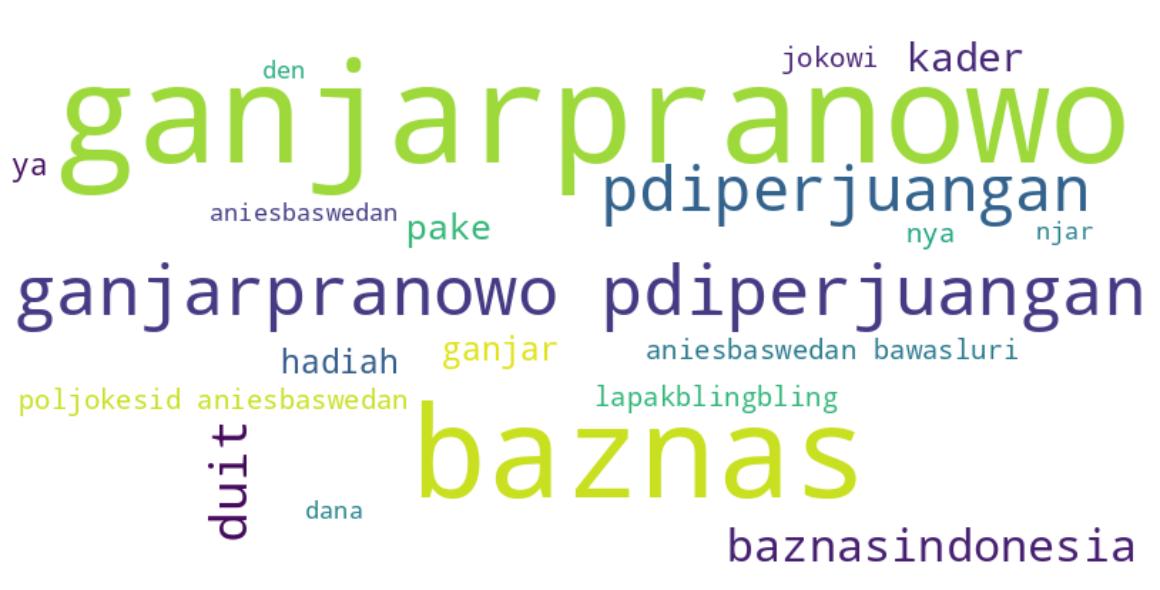

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_0['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-1***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_1 = pd.read_csv('cluster_1.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_1.head(4)

Tweet  Cluster
0  andrerosiade fahrihamzah prabowo lingkar prabo...        1
1  sukardi sandiuno aniesbaswedan prabowo anies s...        1
2  petruspasaribuu aniesbaswedan prabowo gerindra...        1
3  petruspasaribuu aniesbaswedan prabowo gerindra...        1

In [ ]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    979 non-null    object
 1   Cluster  979 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.4+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_1["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0          prabowo   1356
1         subianto    791
2         gerindra    498
3  prabowosubianto    235
4        kerjasama    206
5           partai    156
6        indonesia    152
7         presiden    149
8           menhan    123
9            ketua    119

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

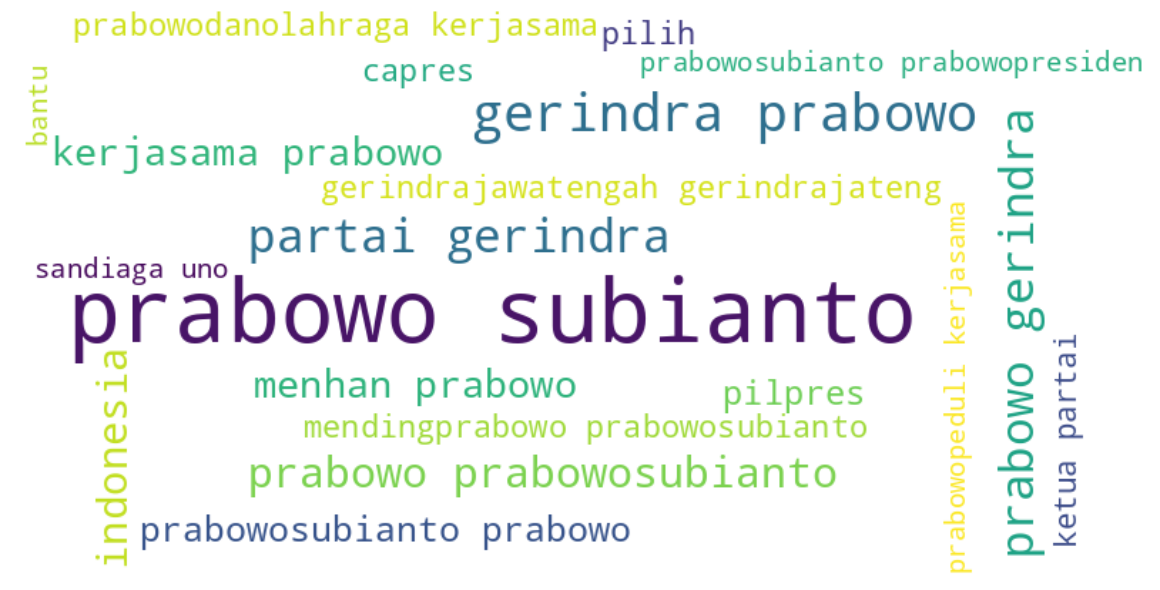

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_1['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud1.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-2***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_2 = pd.read_csv('cluster_2.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_2.head(4)

Tweet  Cluster
0  ssoejoso khojanxx bospurwa aniesbaswedan nyata...        2
1  herypurnomo tvonenews gubernur nya anies baswe...        2
2  addiems dkijakarta salah program unfaedah mant...        2
3  fitashanty aniesbaswedan muipusat mantan guber...        2

In [ ]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    129 non-null    object
 1   Cluster  129 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_2["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0       gubernur    142
1  aniesbaswedan     67
2          anies     38
3            dki     38
4       baswedan     30
5         ganjar     29
6  ganjarpranowo     27
7         jateng     25
8        jakarta     22
9         banjir     19

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

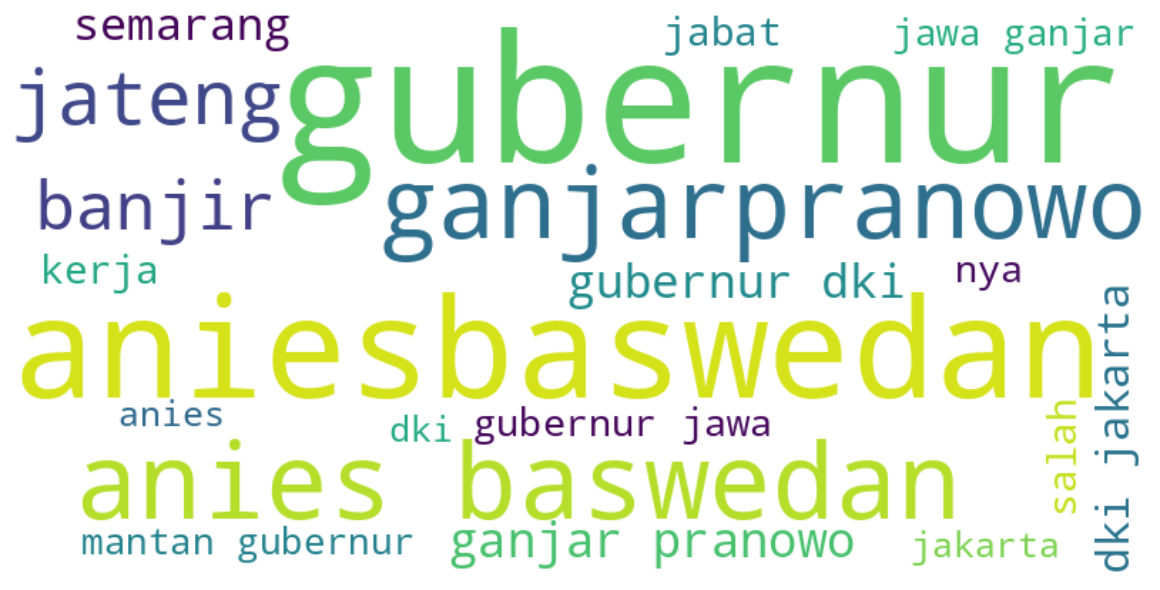

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_2['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud2.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-3***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_3 = pd.read_csv('cluster_3.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_3.head(4)

Tweet  Cluster
0  nasdem tolak keras sistem nadem nasdemnomer it...        3
1  nasdem tolak keras sistem proporsional nadem n...        3
2  mantap sih nasdem tolak milu coblos parpol nad...        3
3  nasdem tolak keras sistem proporsional tutup n...        3

In [ ]:
cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    204 non-null    object
 1   Cluster  204 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_3["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0         nasdem    225
1  aniesbaswedan    206
2          nadem    204
3        itstime    204
4    nasdemnomer    203
5          anies     57
6        jakarta     51
7            kpu     35
8           milu     31
9   proporsional     30

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

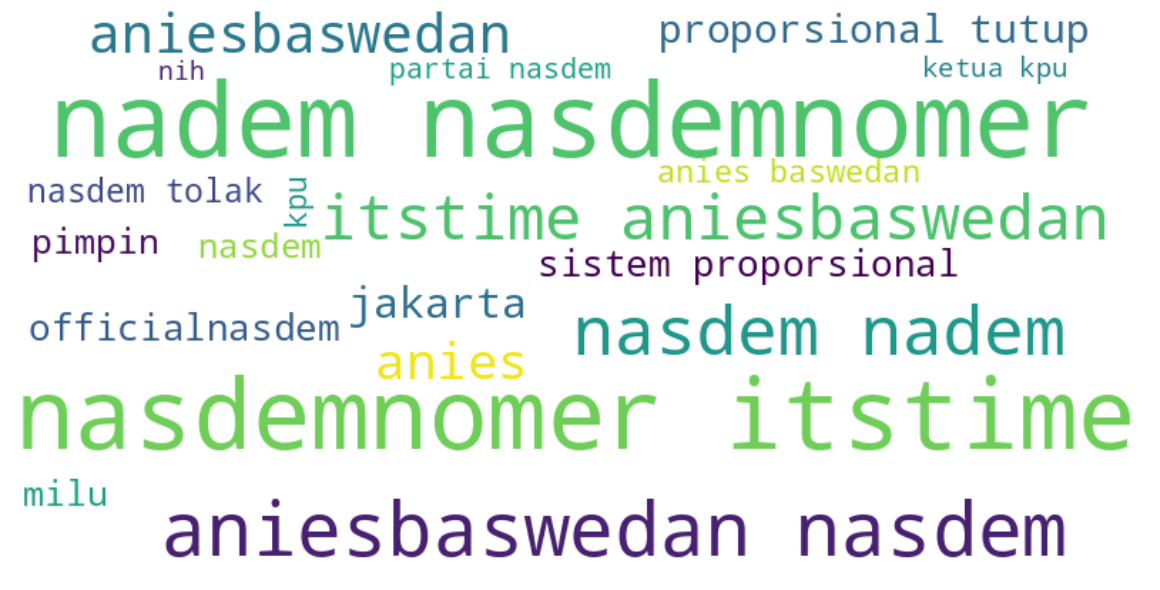

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_3['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud3.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-4***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_4 = pd.read_csv('cluster_4.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_4.head(4)

Tweet  Cluster
0  trendingissue aniesbaswedan coba cek ulang ni ...        4
1  dennysiregar adeuhhhh udh brooo masihhh aniesb...        4
2    mencaricinta ga kpkri tangkep aniesbaswedan aja        4
3                    kopipait tarik ga aniesbaswedan        4

In [ ]:
cluster_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    203 non-null    object
 1   Cluster  203 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_4["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0             ga    240
1  aniesbaswedan    162
2  ganjarpranowo     41
3             ya     31
4            aja     30
5          anies     25
6            nya     18
7           kalo     16
8         nasdem     16
9       muipusat     16

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

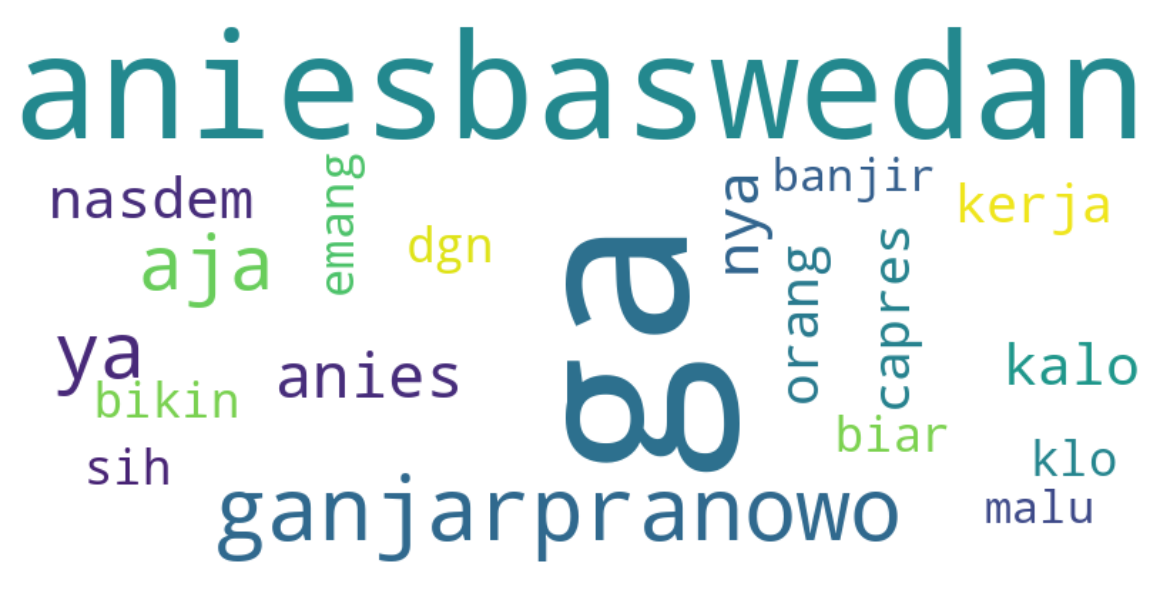

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_4['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud4.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-5***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_5 = pd.read_csv('cluster_5.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_5.head(4)

Tweet  Cluster
0  aniesbaswedan yohanes baswedan hahaha politik ...        5
1  aniesbaswedan nasdem platejohnny video  nambah...        5
2  muhammadsaewad yohanes anies baswedan turun im...        5
3  studsguy rohitahiya gar oposisicerdas tinggal ...        5

In [ ]:
cluster_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    300 non-null    object
 1   Cluster  300 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_5["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0         yohanes    333
1           anies    205
2        baswedan    179
3   aniesbaswedan    158
4            nama    109
5          baptis     38
6  bachrumachmadi     26
7           natal     22
8         selamat     20
9          terima     20

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

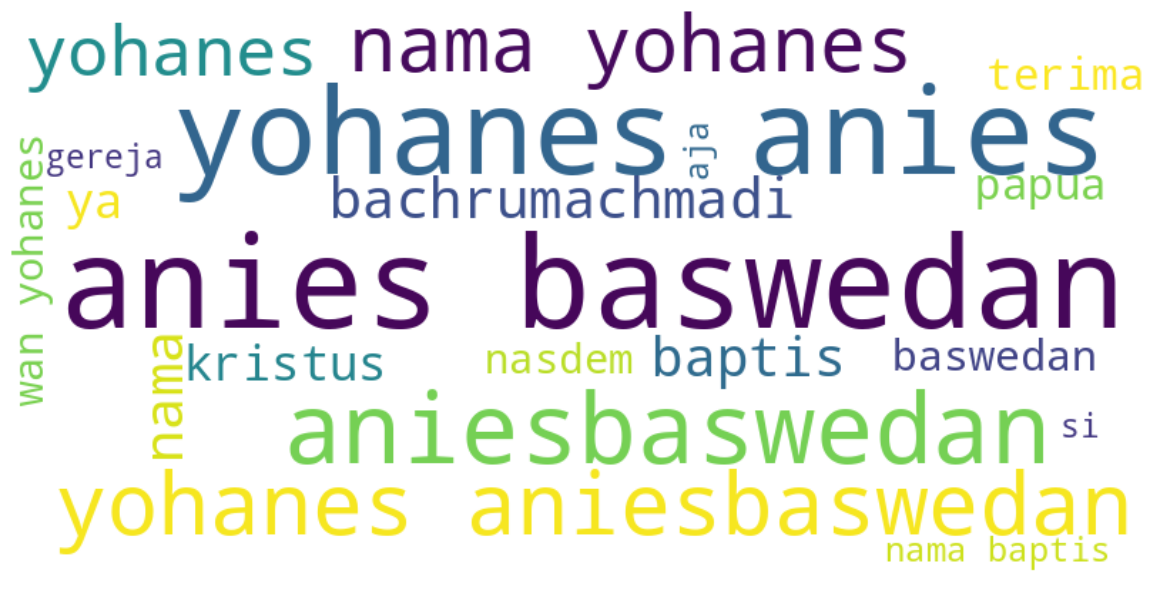

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_5['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud5.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-6***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_6 = pd.read_csv('cluster_6.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_6.head(4)

Tweet  Cluster
0  geloraco sukses calon presiden nilai dr rekam ...        6
1  jakarta menteri tahan menhan prabowo subianto ...        6
2  banyuwangi  menteri tahan menhan prabowo subia...        6
3  menteri tahan menhan prabowo subianto djojohad...        6

In [ ]:
cluster_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    448 non-null    object
 1   Cluster  448 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.1+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_6["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0    prabowo    615
1    menteri    462
2      tahan    448
3   subianto    448
4     menhan    191
5  kerjasama    168
6  indonesia    153
7         ri    140
8      kerja    136
9    kunjung     80

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

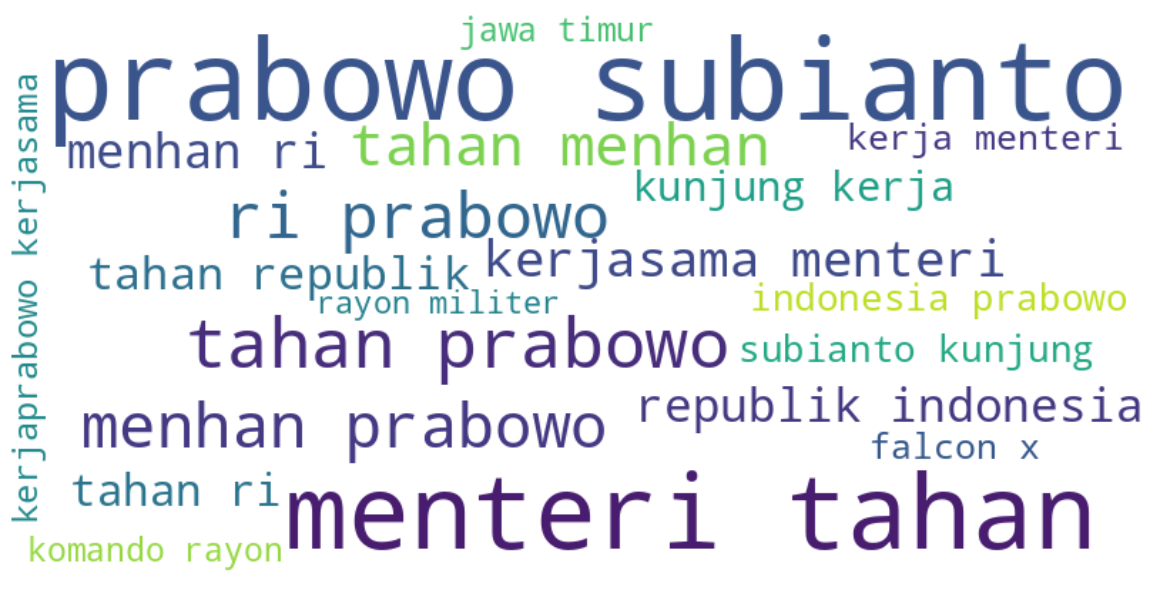

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_6['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud6.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-7***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_7 = pd.read_csv('cluster_7.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_7.head(4)

Tweet  Cluster
0  mari wujud ubah indonesia mas aniesbaswedan su...        7
1  abuwaras anies baswedan anugerah baik pimpin i...        7
2  mdyasmara pilih anies baswedan presiden anies ...        7
3  tim sukses aniesbaswedan aku anies baswedan us...        7

In [ ]:
cluster_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    731 non-null    object
 1   Cluster  731 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.5+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_7["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0      anies    873
1   baswedan    742
2     dukung     92
3   presiden     89
4  indonesia     78
5     capres     72
6    prabowo     69
7      pilih     59
8      orang     58
9   subianto     56

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

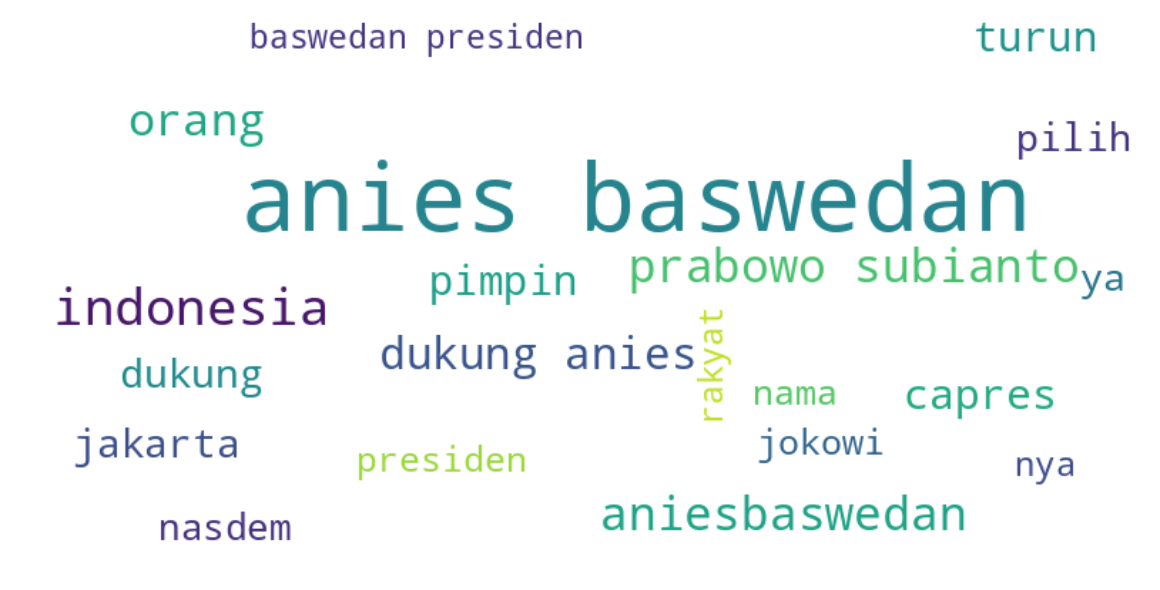

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_7['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud7.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-8***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_8 = pd.read_csv('cluster_8.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_8.head(4)

Tweet  Cluster
0  aniesbaswedan  pakai uang baznas bilang hebat ...        8
1  sapasiap antonku egasuyatno chusnuich aniesbas...        8
2  nyindir habis ganjar pranowo kait duit baznas ...        8
3  orang kayak dijadiin presiden anies baswedan a...        8

In [ ]:
cluster_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    218 non-null    object
 1   Cluster  218 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_8["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0  ganjarpranowo    183
1          kader    131
2         baznas    124
3           dana    101
4           pdip     99
5         partai     94
6          bantu     80
7           uang     61
8         ganjar     59
9          rumah     52

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

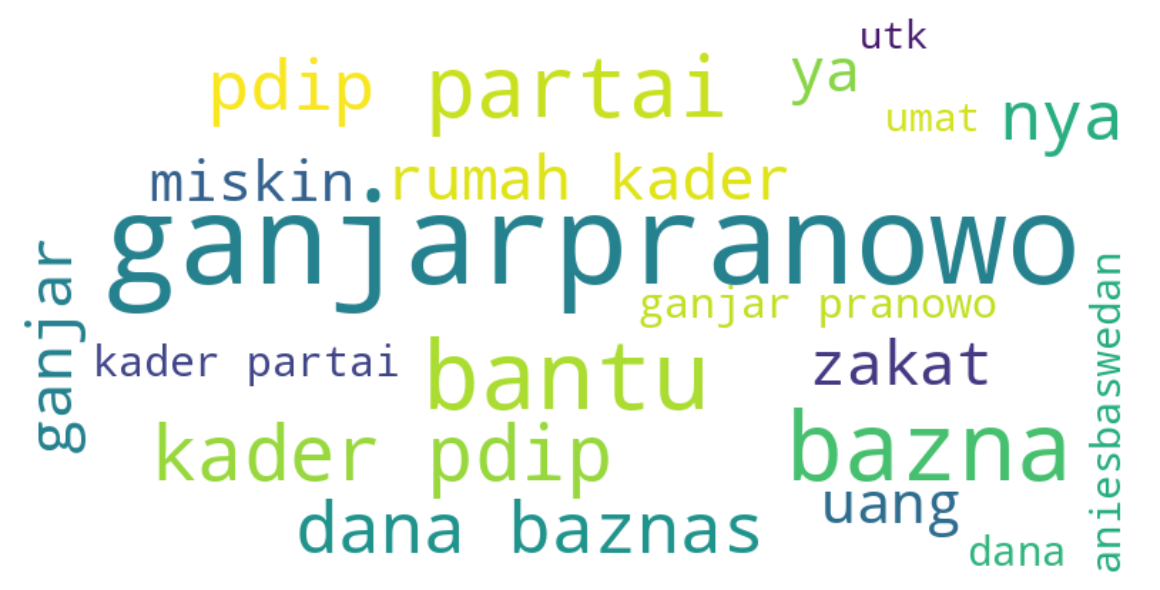

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_8['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud8.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-9***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_9 = pd.read_csv('cluster_9.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_9.head(4)

Tweet  Cluster
0  kabar guys prabowo subianto  yakin  serius kua...        9
1  banget prabowo subianto konsisten penting raky...        9
2  lalalialalia prabowo gerindra info sis prabowo...        9
3  kabar bos prabowo subianto yakin semangat  ser...        9

In [ ]:
cluster_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    205 non-null    object
 1   Cluster  205 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_9["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0    prabowo    623
1     rakyat    313
2   gerindra    212
3   subianto    205
4     menang    205
5  indonesia    194
6       maju    194
7      depan    193
8       nkri    193
9  sejahtera    193

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

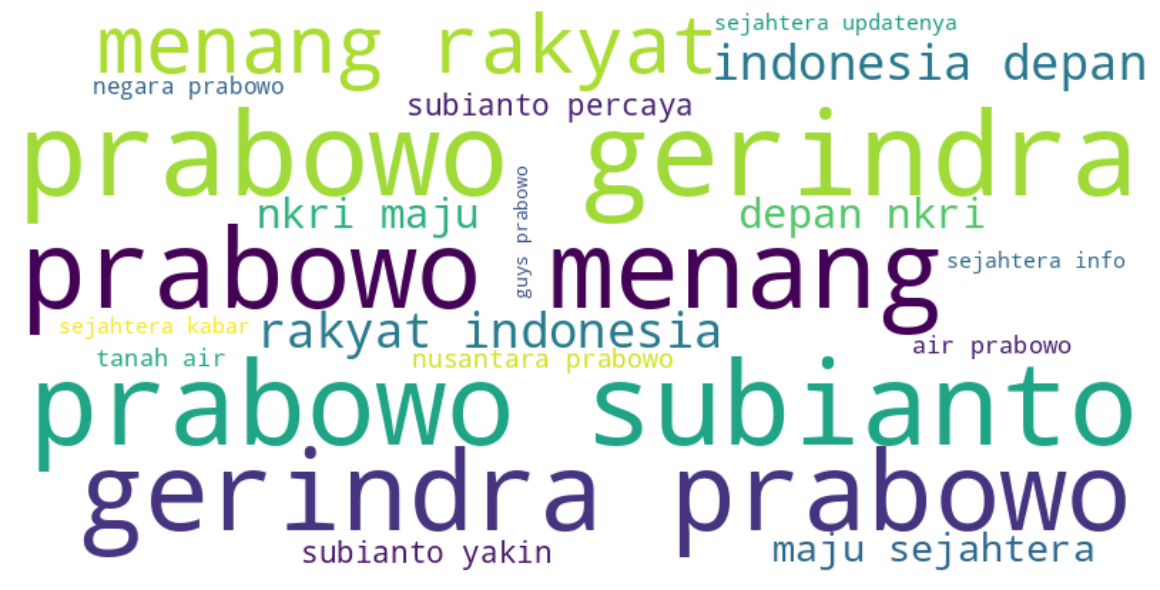

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_9['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud9.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-10***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_10 = pd.read_csv('cluster_10.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_10.head(4)

Tweet  Cluster
0   aniesbaswedan gak  rakyat dki letkol deddy co...       10
1  menteri tahan menhan prabowo subianto sorot ta...       10
2  menteri tahan prabowo subianto tampik duga kal...       10
3  urgensi prabowo subianto pangkat letkol titule...       10

In [ ]:
cluster_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    116 non-null    object
 1   Cluster  116 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_10["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0    pangkat    142
1      deddy    136
2  corbuzier    123
3    prabowo    121
4    tituler    117
5   subianto    100
6     letkol     69
7    kolonel     65
8     letnan     63
9        tni     59

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

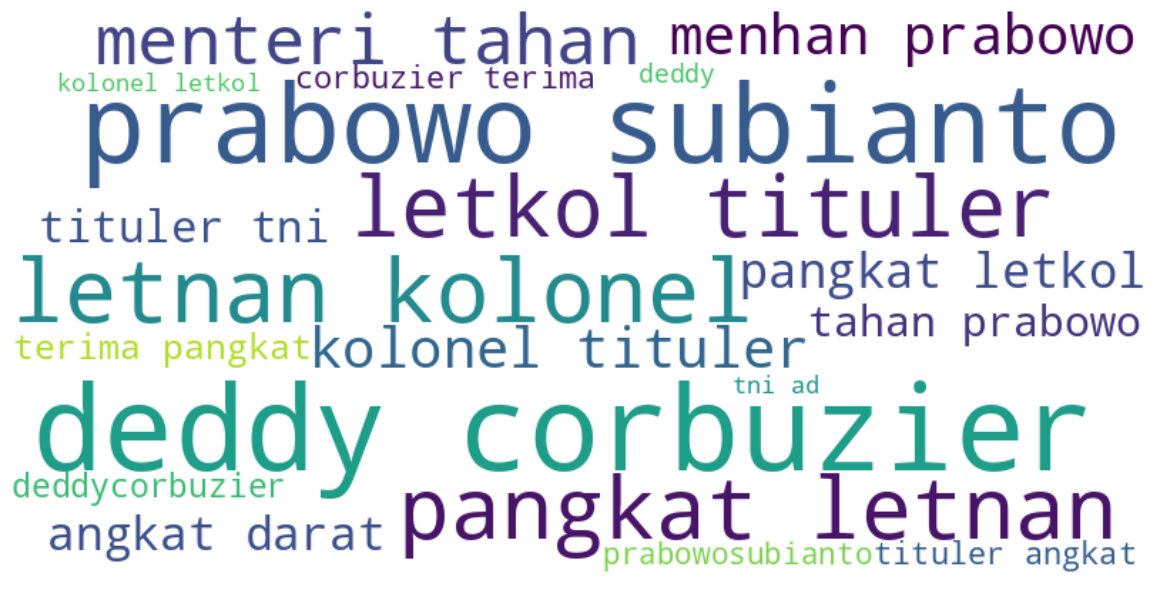

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_10['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud10.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-11***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_11 = pd.read_csv('cluster_11.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_11.head(4)

Tweet  Cluster
0  tohariazka joulepakir mbahwin fitrahdharul eko...       11
1  dwiekaputri mdyasmara muhammadsaewad helmifeli...       11
2  dwiekaputri mdyasmara muhammadsaewad helmifeli...       11
3  dwiekaputri mdyasmara muhammadsaewad helmifeli...       11

In [ ]:
cluster_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    139 non-null    object
 1   Cluster  139 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_11["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0      mdyasmara    139
1  aniesbaswedan    134
2   tatakujiyati     47
3        jhondoe     37
4    marlinaidha     28
5       dedisyah     28
6        yohanes     22
7     helmifelis     21
8   relawananies     21
9             ya     20

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

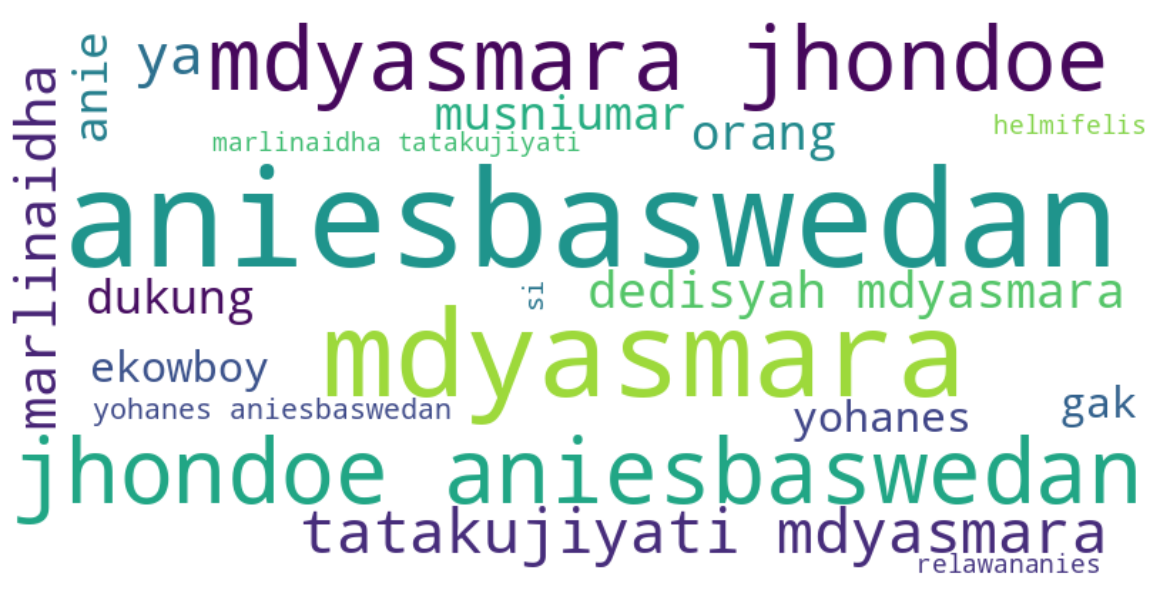

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_11['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud11.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-12***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_12 = pd.read_csv('cluster_12.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_12.head(4)

Tweet  Cluster
0  dedimahardi dghofur addiems dkijakarta kpkri k...       12
1            fadilzein aniesbaswedan president mimpi       12
2    aniesbaswedan dg tambah moga ente gak ngibul lg       12
3  jackdorsiy musniumar aniesbaswedan buzzerrp jd...       12

In [ ]:
cluster_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    2089 non-null   object
 1   Cluster  2089 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 32.8+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_12["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0  aniesbaswedan   2050
1             ya    152
2         nasdem    148
3            gak    143
4       bospurwa    142
5            aja    121
6          anies    114
7          orang    108
8            nya    104
9          kerja     98

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

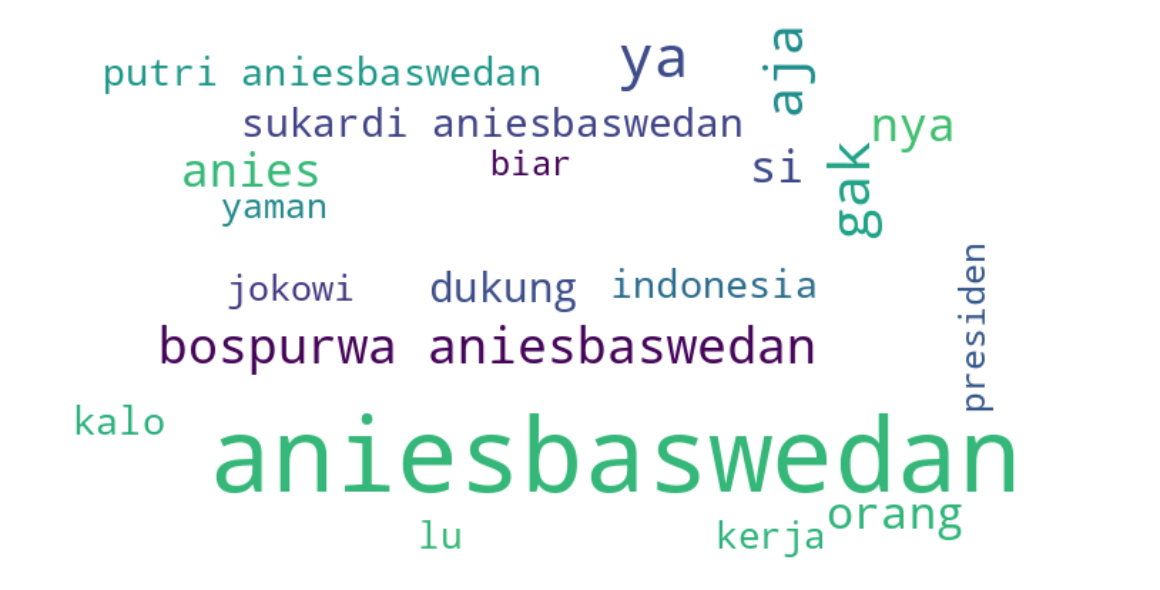

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_12['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud12.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-13***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_13 = pd.read_csv('cluster_13.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_13.head(4)

Tweet  Cluster
0  blekokuhuy krissimpati modienganesa seknasri m...       13
1  krissimpati modienganesa seknasri mandirirusma...       13
2  seknasri mandirirusman paimomontok laode keika...       13
3  seknasri mandirirusman paimomontok laode keika...       13

In [ ]:
cluster_13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    54 non-null     object
 1   Cluster  54 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 992.0+ bytes


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_13["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0       seknasri     54
1    paimomontok     54
2       mnurhuda     54
3        antonku     54
4  aniesbaswedan     53
5         jokowi     50
6        metdros     49
7   modienganesa     37
8    krissimpati     35
9         atiroh     33

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

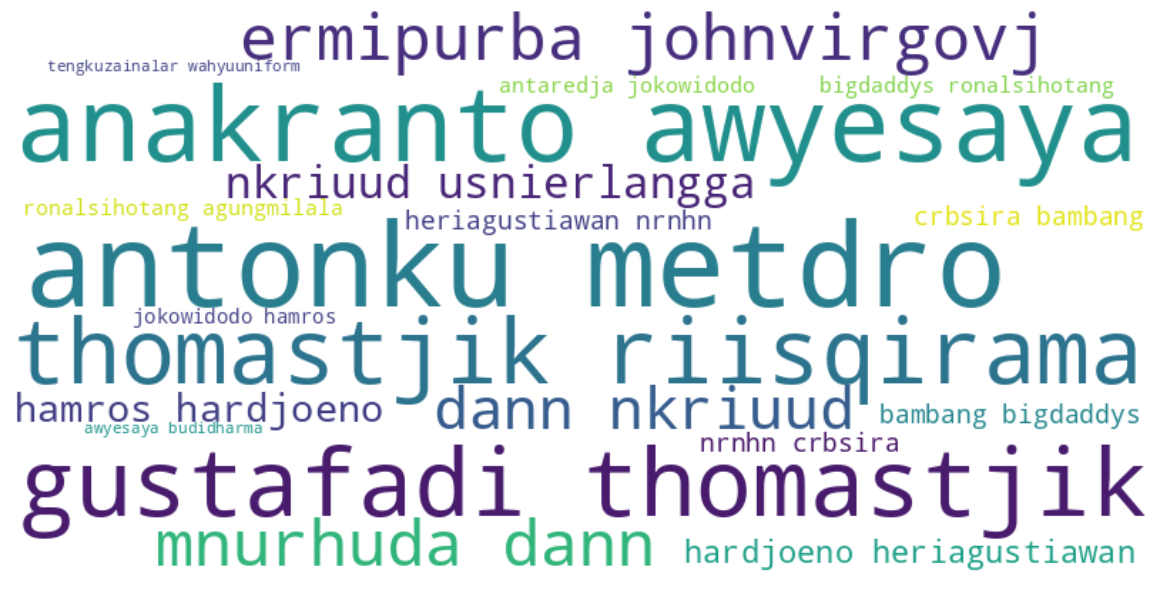

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_13['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud13.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-14***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_14 = pd.read_csv('cluster_14.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_14.head(4)

Tweet  Cluster
0  dedimahardi dghofur addiems dkijakarta kpkri k...       14
1  bjakarta qianzyz aniesbaswedan wes dirunggoke wae       14
2  paltiwest p aniesbaswedan kdg mulut cepat dr o...       14
3                   qianzyz aniesbaswedan partai  ms       14

In [ ]:
cluster_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    648 non-null    object
 1   Cluster  648 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_14["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0  aniesbaswedan    596
1        qianzyz    106
2          anies     91
3          orang     71
4             ya     65
5         dukung     62
6            gak     62
7  ganjarpranowo     60
8            aja     58
9            nya     52

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

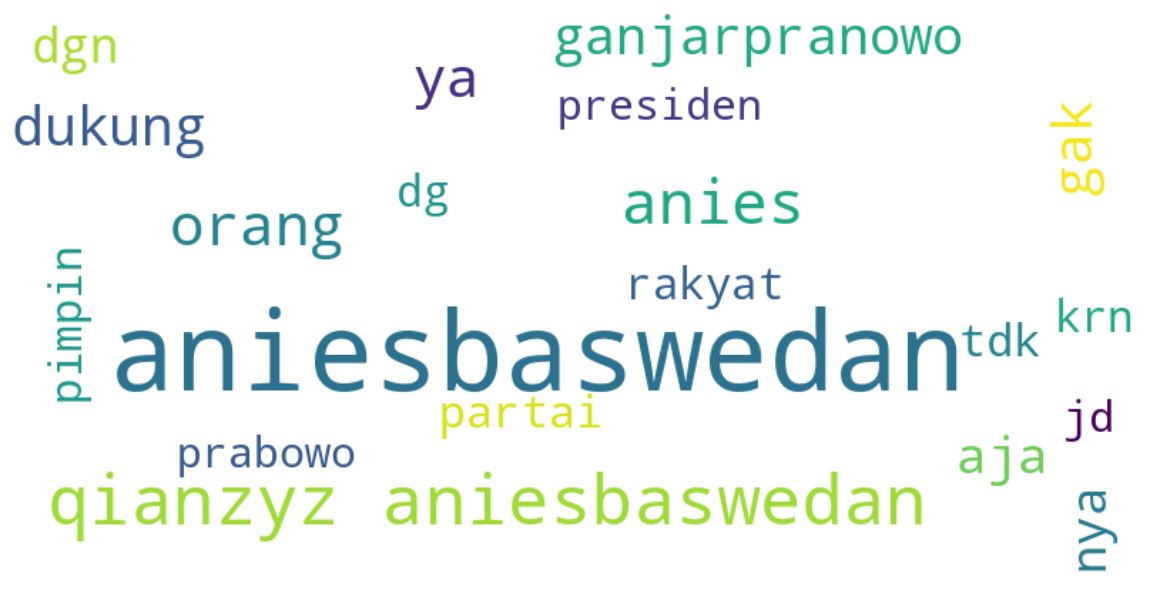

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_14['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud14.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-15***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_15 = pd.read_csv('cluster_15.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_15.head(4)

Tweet  Cluster
0  jantungpiisang nasdem aniesbaswedan ganjarpran...       15
1  ganjarpranowo coba sampean sowan aniesbaswedan...       15
2  jantungpiisang nasdem aniesbaswedan ganjarpran...       15
3  jokobangun susipudjiastuti ganjarpranowo saran...       15

In [ ]:
cluster_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    868 non-null    object
 1   Cluster  868 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.7+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_15["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0  ganjarpranowo    903
1  aniesbaswedan    162
2         ganjar    121
3         banjir    105
4    ganjaranapp     86
5             ya     68
6      chusnuich     68
7       semarang     50
8     bpbdjateng     50
9            gak     47

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

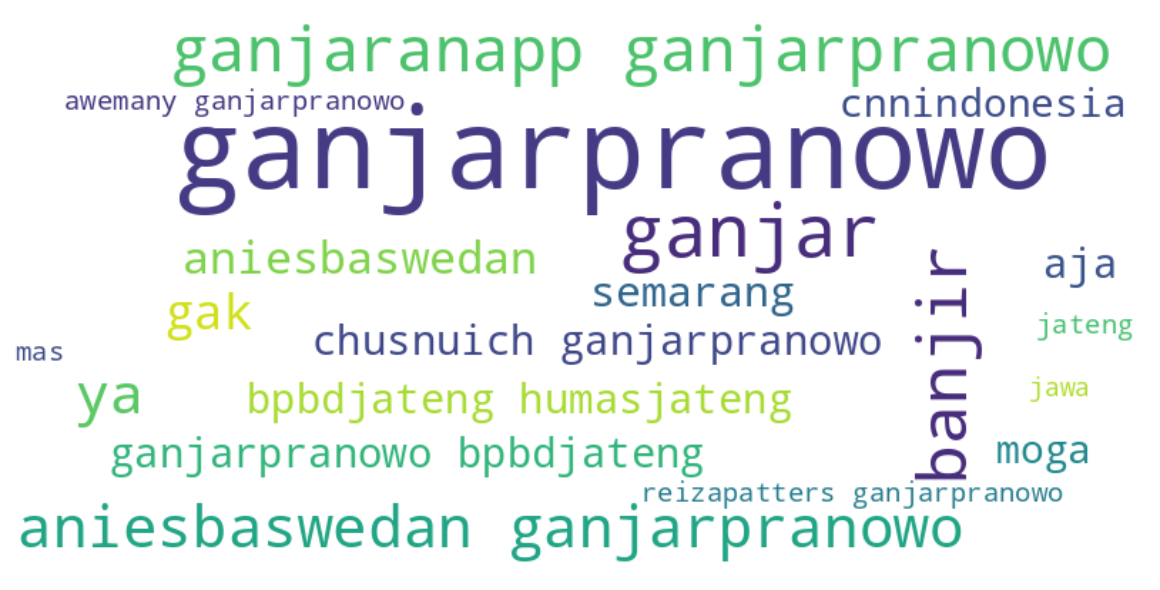

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_15['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud15.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-16***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_16 = pd.read_csv('cluster_16.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_16.head(4)

Tweet  Cluster
0  prabowo subianto pimpin lihat hasil kerja prab...       16
1  prabowo subianto lihat hasil kerja prabowo ger...       16
2  prabowo subianto salah lihat hasil kerja prabo...       16
3  publik puas kerja prabowo subianto prabowo ind...       16

In [ ]:
cluster_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    108 non-null    object
 1   Cluster  108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_16["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0   prabowo    329
1     kerja    156
2      nkri    127
3      maju    124
4  gerindra    113
5     pilih    109
6  subianto    108
7     fokus    106
8     bukti    105
9      baik    103

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

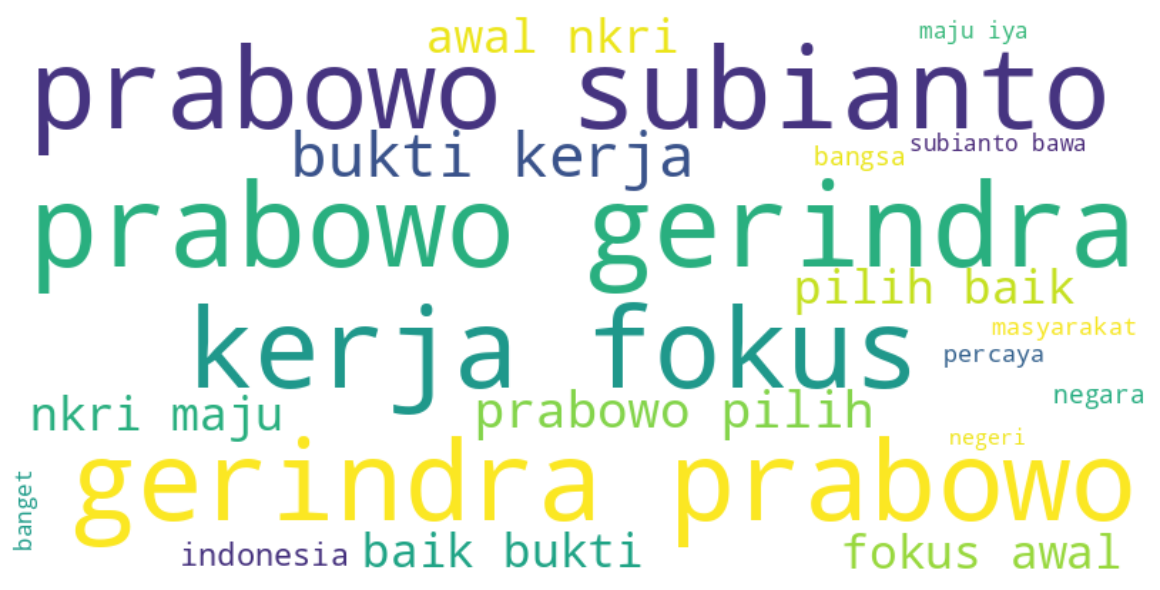

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_16['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud16.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-17***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_17 = pd.read_csv('cluster_17.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_17.head(4)

Tweet  Cluster
0  lurkingcorsa lulusanterbaik choymarkochoy anie...       17
1  choymarkochoy lurkingcorsa richardwps aniesbas...       17
2  choymarkochoy aniesbaswedan anieskom kabar kay...       17
3  choymarkochoy aniesbaswedan anieskom sukses ng...       17

In [ ]:
cluster_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    227 non-null    object
 1   Cluster  227 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_17["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0   aniesbaswedan    230
1        anieskom    225
2   choymarkochoy    197
3       heryidris     42
4           anies     25
5    sumartimarti     22
6  lulusanterbaik     19
7          jokowi     19
8    lurkingcorsa     18
9        presiden     18

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

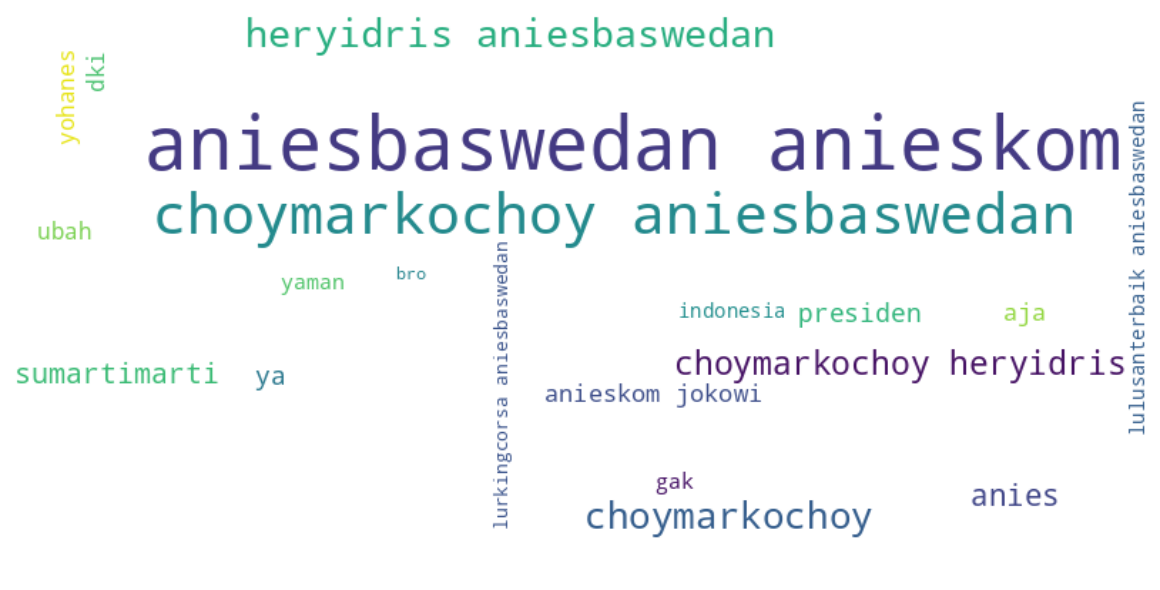

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_17['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud17.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-18***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_18 = pd.read_csv('cluster_18.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_18.head(4)

Tweet  Cluster
0  heran anies baswedan jegal skenario rezim joko...       18
1  rk rkri prediksi pilpres ikut capres prabowo s...       18
2  prabowo subianto ganjar pranowo anies baswedan...       18
3  hasil menhan prabowo subianto tempat urut ting...       18

In [ ]:
cluster_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    260 non-null    object
 1   Cluster  260 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_18["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0           prabowo    237
1            ganjar    228
2          subianto    212
3           pranowo    199
4             anies    112
5             erick     97
6          baswedan     94
7            thohir     91
8            capres     64
9  bangkitbersamaet     62

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

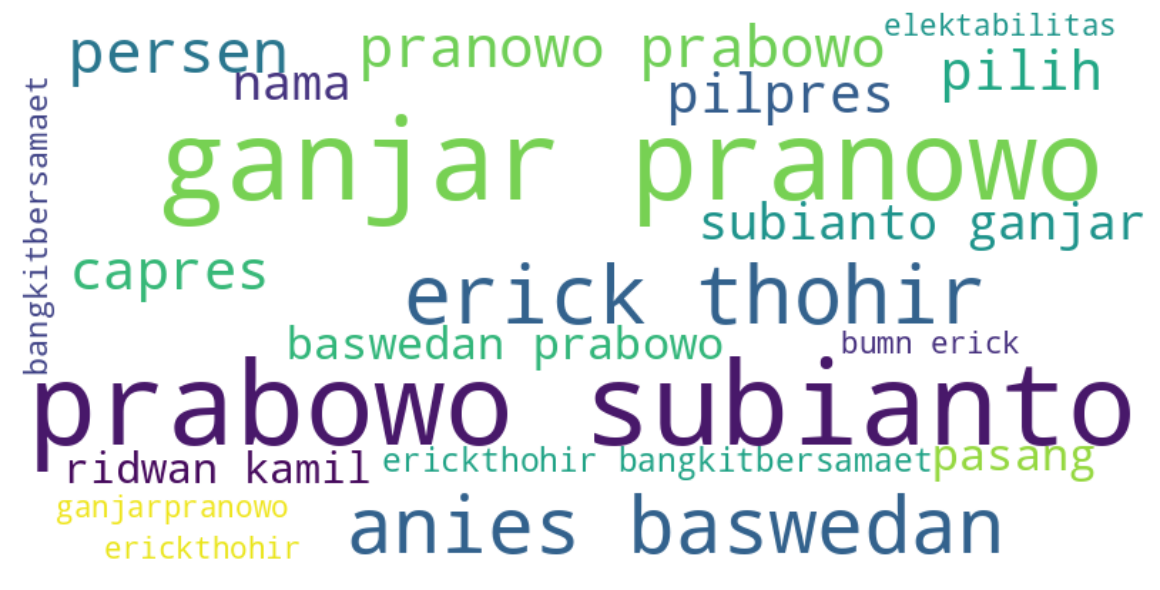

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_18['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud18.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-19***

In [ ]:
import pandas as pd

# Memuat data dari file CSV
cluster_19 = pd.read_csv('cluster_19.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_19.head(4)

Tweet  Cluster
0  yunartowijaya elu ras anies baswedanelu nyengg...       19
1       muhammadsaewad aniesbaswedan kah  loe maksud       19
2  muhammadsaewad yunartowijaya kau goblok kau ba...       19
3  noteiqbal yunartowijaya lha urus nenek moyang ...       19

In [ ]:
cluster_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    158 non-null    object
 1   Cluster  158 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_19["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0  aniesbaswedan    149
1  yunartowijaya     84
2            loe     82
3       geloraco     42
4        mtaufik     38
5        ijonkid     38
6          farid     38
7           otak     27
8       jokotuek     22
9          ntong     22

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

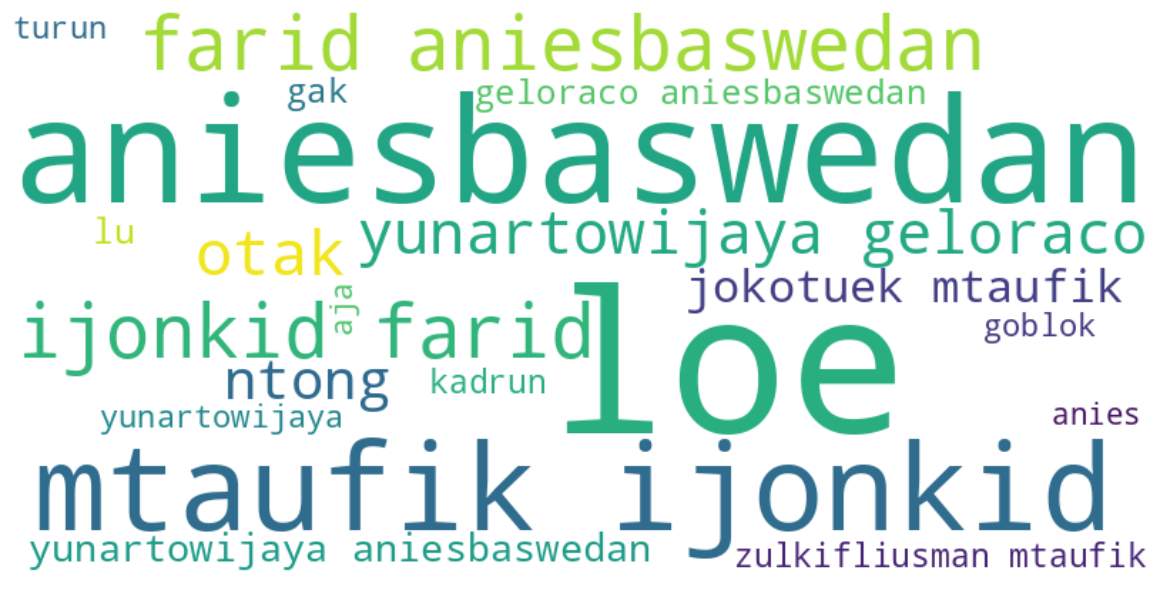

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_19['Tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud19.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***HASIL AKHIR CLUSTER 0-19***

In [ ]:
from collections import Counter
import pandas as pd

# Daftar kluster yang ingin ditampilkan
kluster = [0, 1, 2, 3]  # Ganti dengan nomor kluster yang sesuai

# Menampilkan kata-kata paling umum untuk setiap kluster
for cluster_num in kluster:
    print(f"Kluster {cluster_num}:")
    try:
        cnt = Counter()
        cluster_data = cluster_19[cluster_19['cluster'] == cluster_num]
        for text in cluster_data["Tweet"].values:
            for word in text.split():
                cnt[word] += 1
        most_common_words = cnt.most_common(10)
        temp = pd.DataFrame(most_common_words, columns=['word', 'count'])
        print(temp)
        print()
    except KeyError as e:
        print(f"Kesalahan: {e}")


Kluster 0:
Kesalahan: 'cluster'
Kluster 1:
Kesalahan: 'cluster'
Kluster 2:
Kesalahan: 'cluster'
Kluster 3:
Kesalahan: 'cluster'
